# Análise de Volatilidade Diária de Ativos

Este relatório tem como objetivo analisar a volatilidade intradiária de ativos financeiros utilizando dados históricos obtidos da API do Yahoo Finance. A análise contempla:

- Coleta e tratamento de dados históricos de preços.
- Avaliação da variação de preços dentro de um mesmo dia.
- Visualização gráfica da volatilidade observada.

### Coleta de Dados Históricos

Os dados são coletados utilizando a biblioteca `yfinance`, com frequência de 1 dia e intervalo de 1 minuto para observação intradiária.

In [6]:
!pip install yfinance


In [7]:
import yfinance as yf

# Definindo os ativos e o período
ativos = ['AAPL', 'MSFT', 'GOOGL']  # Exemplo: Apple, Microsoft, Google
inicio = '2023-01-01'
fim = '2025-01-23'

# Baixando os dados
dados_ativos = yf.download(ativos, start=inicio, end=fim)

# Salvando os dados em um arquivo CSV
dados_ativos.to_csv('dados_ativos.csv')

print("Dados baixados e salvos com sucesso!")


[*********************100%***********************]  3 of 3 completed

Dados baixados e salvos com sucesso!


In [8]:
dados_ativos.head()

Price            Close                               High             \
Ticker            AAPL      GOOGL        MSFT        AAPL      GOOGL   
Date                                                                   
2023-01-03  123.768471  88.798103  235.711685  129.537796  90.721133   
2023-01-04  125.045036  87.761856  225.400925  127.321104  90.322573   
2023-01-05  123.718987  85.888641  218.720566  126.440369  87.253696   
2023-01-06  128.271103  87.024521  221.298233  128.934129  87.373263   
2023-01-09  128.795593  87.702065  223.452881  132.021678  89.724738   

Price                          Low                               Open  \
Ticker            MSFT        AAPL      GOOGL        MSFT        AAPL   
Date                                                                    
2023-01-03  241.782061  122.877835  88.200264  233.566876  128.924252   
2023-01-04  229.110043  123.778358  86.954777  222.311624  125.569520   
2023-01-05  223.875966  123.461698  85.589730  218.179443  125.807030   
2023-01-06  222.114834  123.590330  84.553483  215.808342  124.698677   
2023-01-09  227.506369  128.538304  87.542646  222.754353  129.112270   

Price                                 Volume                      
Ticker          GOOGL        MSFT       AAPL     GOOGL      MSFT  
Date                                                              
2023-01-03  89.266399  239.155173  112117500  28131200  25740000  
2023-01-04  90.023653  228.529573   89113600  34854800  50623400  
2023-01-05  87.154058  223.531611   80962700  27194400  39585600  
2023-01-06  86.476512  219.399402   87754700  41381500  43613600  
2023-01-09  88.040840  222.793701   70790800  29003900  27369800

### Análise da Volatilidade Intradiária

A volatilidade é avaliada com base na diferença entre os preços máximo e mínimo observados no intervalo de 1 minuto.

[*********************100%***********************]  3 of 3 completed


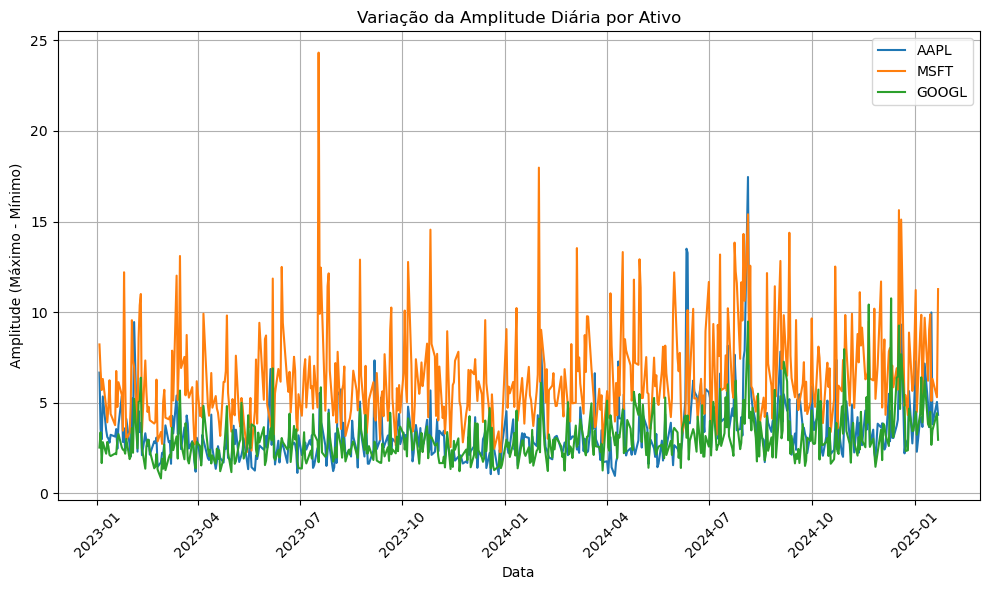

O ativo com maior volatilidade é: MSFT


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definindo os ativos e o período
ativos = ['AAPL', 'MSFT', 'GOOGL']  # Exemplo: Apple, Microsoft, Google
inicio = '2023-01-01'
fim = '2025-01-23'

# Baixando os dados
dados_ativos = yf.download(ativos, start=inicio, end=fim)

# Criando um novo DataFrame para armazenar as amplitudes de cada ativo
amplitude_ativos = pd.DataFrame(index=dados_ativos.index)

# Calculando a amplitude diária (máximo - mínimo) para cada ativo
for ativo in ativos:
    amplitude_ativos[ativo] = dados_ativos['High'][ativo] - dados_ativos['Low'][ativo]

# Plotando o gráfico para cada ativo
plt.figure(figsize=(10, 6))

for ativo in ativos:
    # Plotando a variação da amplitude ao longo do período
    plt.plot(amplitude_ativos.index, amplitude_ativos[ativo], label=ativo)

# Personalizando o gráfico
plt.title('Variação da Amplitude Diária por Ativo')
plt.xlabel('Data')
plt.ylabel('Amplitude (Máximo - Mínimo)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Identificando o ativo com maior volatilidade
volatilidade_ativos = amplitude_ativos.mean()

# Imprimindo o ativo com maior volatilidade
ativo_mais_volatil = volatilidade_ativos.idxmax()
print(f'O ativo com maior volatilidade é: {ativo_mais_volatil}')



### Conclusões

A análise gráfica permite observar padrões distintos de oscilação entre os ativos selecionados. A amplitude intradiária pode indicar momentos de maior liquidez ou eventos relevantes ao mercado.

Esta análise pode ser expandida com o uso de medidas estatísticas complementares, como desvio padrão móvel ou retornos logarítmicos.